# MODELIZACIÓN PARA CLASIFICACIÓN

**IMPORTANTE**: Recuerda hacer una copia de esta plantilla para no machacar la original.

**IMPORTANTE**: Esta plantilla está diseñada para una visión de máximos utilizando el framework de The Ultimate Algo Machine. Si tienes problemas de memoria o rendimiento recuerda reducir el problema mediante:

* Muestreo
* Balanceo undersampling
* Reducir el número de algoritmos a testar
* Reducir el número de parámetros a testar
* Usar random search y especificar un n_iter adecuado

## IMPORTAR PAQUETES

In [3]:
import sklearn
print(sklearn.__version__)

1.5.1


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import classification_report

#from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
import scikitplot as skplt
from yellowbrick.classifier import discrimination_threshold

#Autocompletar rápido
%config IPCompleter.greedy=True

#Desactivar la notación científica
pd.options.display.float_format = '{:.2f}'.format

#Desactivar los warnings
import warnings
warnings.filterwarnings("ignore")

## IMPORTAR LOS DATOS

Sustituir la ruta del proyecto.

In [5]:
ruta_proyecto = 'C:/Users/USER/Desktop/DSD4B (ZERO TO HERO)/03_MACHINE_LEARNING/08_CASOS/01_LEADSCORING'

Nombres de los ficheros de datos.

In [6]:
nombre_x = 'x_final.pickle'
nombre_y = 'y_final.pickle'

Cargar los datos.

In [7]:
x = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_x)
y = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_y)

## MODELIZAR

### Reservar el dataset de validacion

In [8]:
train_x,val_x,train_y,val_y = train_test_split(x,y,test_size=0.3)

### Crear el pipe y el diccionario de algoritmos, parámetros y valores a testar

Modificar para dejar solo los algoritmos que se quieran testar.

Modificar los parámetros.

In [9]:
pipe = Pipeline([('algoritmo',RandomForestClassifier())])

grid = [{'algoritmo': [LogisticRegression()],
         'algoritmo__n_jobs': [-1],
         'algoritmo__solver': ['saga'],
         'algoritmo__penalty': ['elasticnet', 'l1', 'l2', 'none'],
         'algoritmo__C': [0,0.25,0.5,0.75,1]},
        
        {'algoritmo': [RandomForestClassifier()],
         'algoritmo__n_jobs': [-1],
         'algoritmo__max_depth': [5,10,15],
         'algoritmo__n_estimators': [50,100,200]},
        
        {'algoritmo': [XGBClassifier()],
         'algoritmo__n_jobs': [-1],
         'algoritmo__verbosity': [0],#para que no salgan warnings
         'algoritmo__learning_rate': [0.01,0.025,0.05,0.1],
         'algoritmo__max_depth': [5,10,20],
         'algoritmo__reg_alpha': [0,0.1,0.5,1],
         'algoritmo__reg_lambda': [0.01,0.1,1],
         'algoritmo__n_estimators': [100,500,1000]},
        
        {'algoritmo': [HistGradientBoostingClassifier()],
         'algoritmo__learning_rate': [0.01,0.025,0.05,0.1],
         'algoritmo__max_iter': [50,100,200],
         'algoritmo__max_depth': [5,10,20],
         'algoritmo__min_samples_leaf': [500],
         'algoritmo__scoring': ['roc_auc'],
         'algoritmo__l2_regularization': [0,0.25,0.5,0.75,1]}
       ]

### Optimizar los hiper parámetros

Elegir si se quiere usar grid search o random search.

Comentar la opción que no se vaya a usar.

####  Con grid search

In [12]:
scoring = {
    'roc_auc': 'roc_auc',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}


grid_search = GridSearchCV(estimator= pipe, 
                            param_grid = grid, 
                            cv = 3, 
                            scoring = scoring,
                            refit='roc_auc',
                            verbose = 0,
                            n_jobs = -1)

modelo = grid_search.fit(train_x,train_y)

pd.DataFrame(grid_search.cv_results_).sort_values(by = 'rank_test_roc_auc')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algoritmo,param_algoritmo__C,param_algoritmo__n_jobs,param_algoritmo__penalty,param_algoritmo__solver,param_algoritmo__max_depth,...,split2_test_recall,mean_test_recall,std_test_recall,rank_test_recall,split0_test_f1,split1_test_f1,split2_test_f1,mean_test_f1,std_test_f1,rank_test_f1
52,0.31,0.02,0.06,0.00,"XGBClassifier(base_score=None, booster=None, c...",NaN,-1.00,NaN,NaN,5.00,...,0.77,0.77,0.01,2,0.78,0.77,0.77,0.77,0.00,2
255,0.07,0.00,0.03,0.00,"XGBClassifier(base_score=None, booster=None, c...",NaN,-1.00,NaN,NaN,5.00,...,0.76,0.77,0.01,10,0.77,0.77,0.77,0.77,0.00,14
256,0.08,0.01,0.03,0.00,"XGBClassifier(base_score=None, booster=None, c...",NaN,-1.00,NaN,NaN,5.00,...,0.77,0.78,0.01,1,0.78,0.77,0.77,0.78,0.00,1
64,0.60,0.01,0.10,0.00,"XGBClassifier(base_score=None, booster=None, c...",NaN,-1.00,NaN,NaN,5.00,...,0.74,0.76,0.02,37,0.78,0.76,0.76,0.77,0.01,34
253,0.07,0.00,0.04,0.01,"XGBClassifier(base_score=None, booster=None, c...",NaN,-1.00,NaN,NaN,5.00,...,0.77,0.77,0.01,3,0.78,0.77,0.77,0.77,0.00,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,0.00,0.00,0.00,0.00,LogisticRegression(),0.25,-1.00,elasticnet,saga,NaN,...,NaN,NaN,NaN,630,NaN,NaN,NaN,NaN,NaN,630
3,0.00,0.00,0.00,0.00,LogisticRegression(),0.00,-1.00,none,saga,NaN,...,NaN,NaN,NaN,630,NaN,NaN,NaN,NaN,NaN,630
1,0.00,0.00,0.00,0.00,LogisticRegression(),0.00,-1.00,l1,saga,NaN,...,NaN,NaN,NaN,630,NaN,NaN,NaN,NaN,NaN,630
11,0.00,0.00,0.00,0.00,LogisticRegression(),0.50,-1.00,none,saga,NaN,...,NaN,NaN,NaN,630,NaN,NaN,NaN,NaN,NaN,630


In [26]:
# Extraer y mostrar la tabla de métricas
import pandas as pd

# Obtener los resultados de la búsqueda de hiperparámetros
cv_results = grid_search.cv_results_

# Crear un DataFrame con las métricas importantes
results_df = pd.DataFrame({
    'Modelo': [
        'Logistic Regression' if 'LogisticRegression' in str(param['algoritmo']) else
        'Random Forest' if 'RandomForestClassifier' in str(param['algoritmo']) else
        'XGBoost' if 'XGBClassifier' in str(param['algoritmo']) else
        'Hist Gradient Boosting'
        for param in cv_results['params']
    ],
    'Hiperparámetros': [str(param) for param in cv_results['params']],
    'AUC-ROC': cv_results['mean_test_roc_auc'],
    'Precisión': cv_results.get('mean_test_precision', 'No disponible'),
    'Recall': cv_results.get('mean_test_recall', 'No disponible'),
    'F1-Score': cv_results.get('mean_test_f1', 'No disponible')
})

# Seleccionar la mejor solución por cada modelo
best_results = results_df.loc[results_df.groupby('Modelo')['AUC-ROC'].idxmax()]

# Ordenar por AUC-ROC
best_results = best_results.sort_values(by='AUC-ROC', ascending=False)

# Mostrar la tabla de las mejores soluciones
best_results



,Modelo,Hiperparámetros,AUC-ROC,Precisión,Recall,F1-Score
52,XGBoost,"{'algoritmo': XGBClassifier(base_score=None, b...",0.89,0.77,0.77,0.77
25,Random Forest,"{'algoritmo': RandomForestClassifier(), 'algor...",0.89,0.77,0.76,0.77
17,Logistic Regression,"{'algoritmo': LogisticRegression(), 'algoritmo...",0.87,0.76,0.70,0.73
562,Hist Gradient Boosting,{'algoritmo': HistGradientBoostingClassifier()...,0.82,0.71,0.70,0.71


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

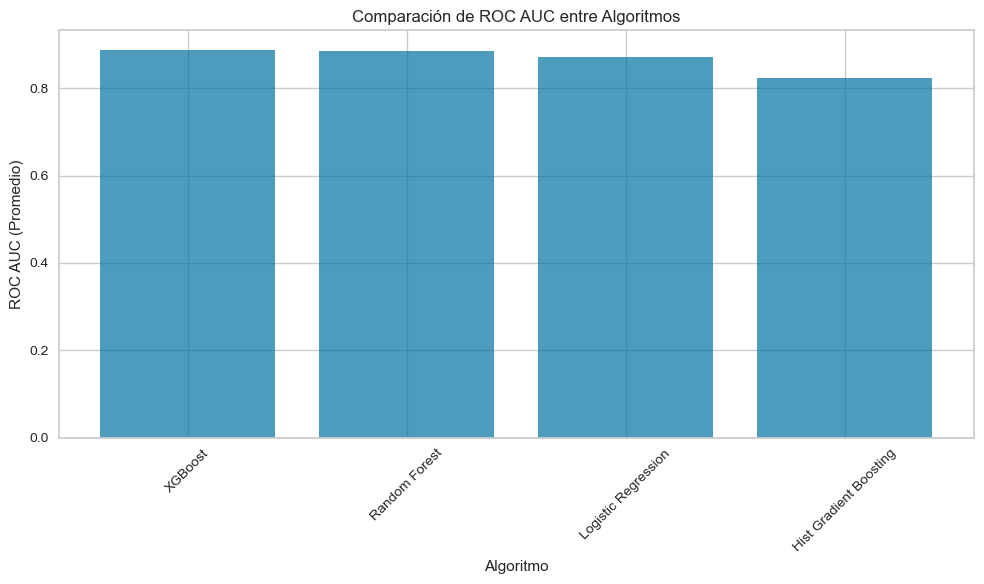

In [28]:
# ## GENERAR GRÁFICO DE COMPARACIÓN
plt.figure(figsize=(10, 6))
plt.bar(best_results["Modelo"], best_results["AUC-ROC"], alpha=0.7)
plt.title("Comparación de ROC AUC entre Algoritmos")
plt.ylabel("ROC AUC (Promedio)")
plt.xlabel("Algoritmo")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

De acuerdo con los resultados de la tabla, el modelo XGBoost obtuvo el mejor rendimiento con un AUC-ROC de 0.89, precisión de 0.77, recall de 0.77 y F1-score de 0.77. Por lo tanto, se selecciona este modelo para la fase de evaluación.

## EVALUACIÓN

### Predecir sobre validación

In [30]:
pred = modelo.best_estimator_.predict_proba(val_x)[:, 1]

### Evaluacion de metricas para targets binarias

ROC AUC: 0.893
F1-Score: 0.780
Precision: 0.783
Recall: 0.777


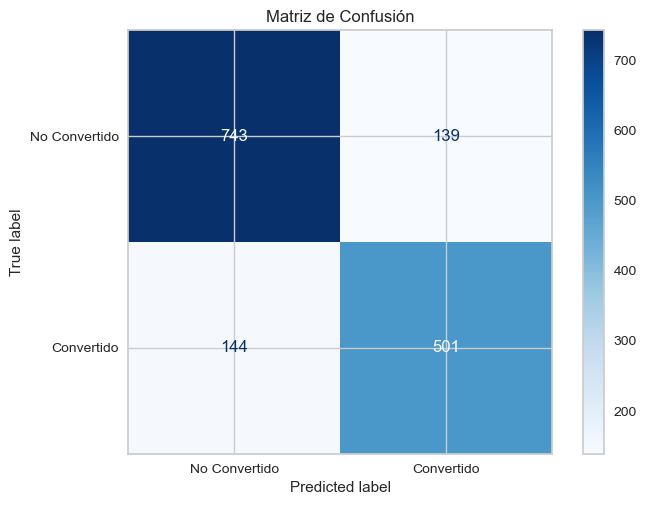

In [36]:
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calcular las principales métricas
roc_auc = roc_auc_score(val_y, pred)
f1 = f1_score(val_y, (pred >= 0.5).astype(int))  # Convertir predicciones en 0 o 1 según el umbral de 0.5
precision = precision_score(val_y, (pred >= 0.5).astype(int))
recall = recall_score(val_y, (pred >= 0.5).astype(int))

# Mostrar las métricas
print(f"ROC AUC: {roc_auc:.3f}")
print(f"F1-Score: {f1:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")

# Crear y mostrar la matriz de confusión
cm = confusion_matrix(val_y, (pred >= 0.5).astype(int))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Convertido", "Convertido"])

# Configurar visualización
disp.plot(cmap='Blues', values_format='d')
plt.title("Matriz de Confusión")
plt.show()


### Examinar el mejor modelo

In [32]:
modelo.best_estimator_.steps

[('algoritmo',
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=0.01, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=5, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=500, n_jobs=-1,
                num_parallel_tree=None, random_state=None, ...))]

In [33]:
modelo.best_estimator_.named_steps['algoritmo'].get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.01,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 5,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': 500,
 'n_jobs': -1,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': 1,
 'reg_lambda': 1,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': 0}

## REPORTING DE EVALUACIÓN DEL MODELO

### Gain Chart

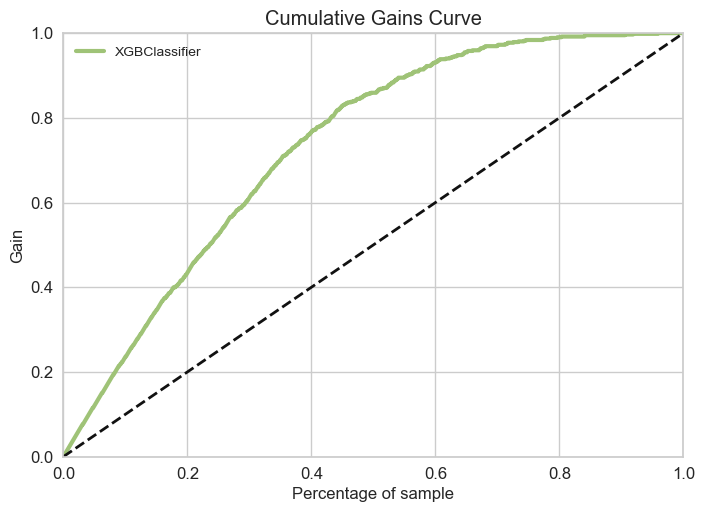

In [73]:
fig, ax = plt.subplots()

skplt.metrics.plot_cumulative_gain(val_y, modelo.best_estimator_.predict_proba(val_x), ax=ax) 

# Eliminamos la línea de los ceros, que internamente tiene etiqueta 'Class 0'
lines = ax.get_lines()
# Buscar por la etiqueta y eliminar la línea correspondiente
for line in lines:
    if line.get_label() == 'Class 0':
        line.remove()

# Personalizamos la leyenda sin incluir la línea de los ceros
plt.legend(labels=['XGBClassifier'])

# Ahora puedes mostrar el gráfico
plt.show()

### Lift Chart

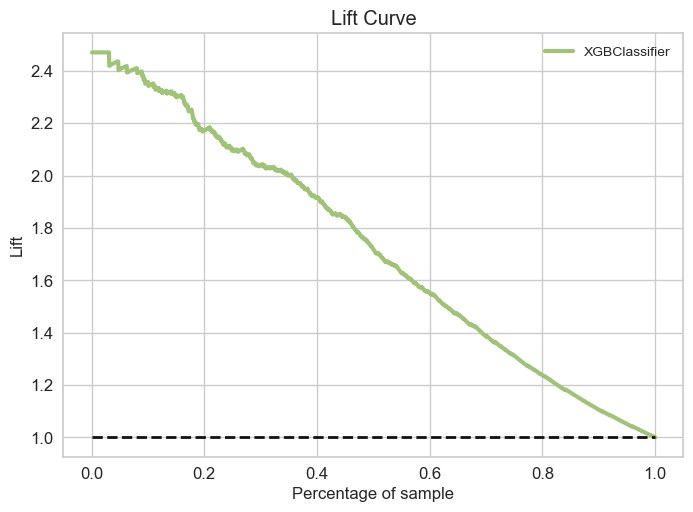

In [49]:
fig, ax = plt.subplots()

skplt.metrics.plot_lift_curve(val_y, modelo.best_estimator_.predict_proba(val_x), ax=ax) 

# Eliminamos la línea de los ceros, que internamente tiene etiqueta 'Class 0'
lines = ax.get_lines()
# Buscar por la etiqueta y eliminar la línea correspondiente
for line in lines:
    if line.get_label() == 'Class 0':
        line.remove()

# Personalizamos la leyenda sin incluir la línea de los ceros
plt.legend(labels=['XGBClassifier'])

# Ahora puedes mostrar el gráfico
plt.show()

### ROC Chart

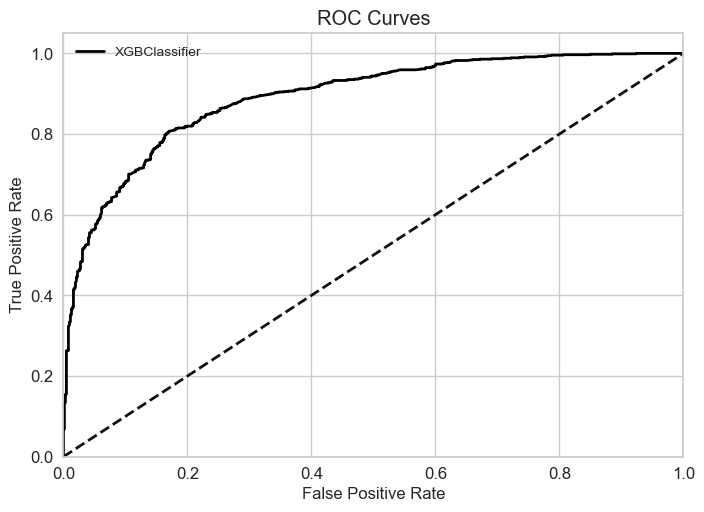

In [50]:
fig, ax = plt.subplots()

# Generamos la gráfica ROC
skplt.metrics.plot_roc(val_y, modelo.best_estimator_.predict_proba(val_x), ax=ax)

# Obtenemos todas las líneas y las leyendas
lines = ax.get_lines()

# Recorremos las líneas para eliminar las no deseadas, excepto la línea de la clase 0
for line in lines:
    if 'ROC curve of class 0' in line.get_label():
        line.set_label('Modelo')
    elif line.get_linestyle() != '--':  # Mantenemos la línea punteada pero sin leyenda
        line.set_visible(False)

# Solo añadimos al leyenda la línea de la clase 0 renombrada a 'Modelo'
handles, labels = ax.get_legend_handles_labels()
new_handles = [h for h, l in zip(handles, labels) if l == 'Modelo']
new_labels = ['XGBClassifier']

ax.legend(new_handles, new_labels, loc='best')

# Ahora puedes mostrar el gráfico
plt.show();


# UMBRAL DE CORTE Y EXPLOTACION DE NEGOCIO

## Personalizar el sistema mediante el umbral de corte

Lo anterior significa que nosotros podemos modular el mismo modelo para ajustarlo mejor a cada objetivo de negocio.

Incluso podemos cambiar la salida (priorizar precision o recall) de forma dinámica sin tener que crear o actualizar el modelo!!

Ejemplo sistema de identificación de fraude de los bancos.

Para ayudarnos a elegir el mejor punto de corte para nuestros objetivos tenemos 2 herramientas:

* El gráfico de precision-recall
* El gráfico de umbrales de corte

### Gráfico de precision-recall

Con este gráfico podemos ver la relación entre precision y recall a lo largo de los umbrales de corte, y buscar si existen zonas que se adapten a nuestros objetivos.

Aprendimos a hacerlo hace ya muchas lecciones.

Y te dije que lo utilizaríamos posteriormente. Pues es ahora.

Si no lo recuerdas repasa el módulo Metricas de target binaria de la sección PRINCIPIOS DE MACHINE LEARNING.

Para hacer este gráfico vamos a usar plot_precision_recall_curve del módulo metrics, al que hay que pasarle el modelo, las predictoras y la target.

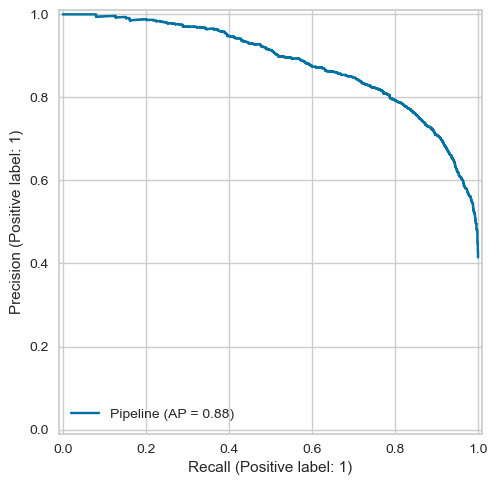

In [51]:
from sklearn.metrics import PrecisionRecallDisplay

PrecisionRecallDisplay.from_estimator(modelo.best_estimator_,x,y);
plt.show()

### Gráfico de umbrales de corte

Con este gráfico podemos ver las métricas de precision, recall y F1 para cada uno de los umbrales de corte y buscar el que maximiza nuestro objetivo.

Aprendimos a hacerlo hace ya muchas lecciones.

Si no lo recuerdas repasa el módulo Metricas de target binaria de la sección PRINCIPIOS DE MACHINE LEARNING.

Para hacer este gráfico vamos a usar la función discrimination_threshold del paquete yellowbrick, a la que hay que pasarle el modelo, las predictoras y la target.

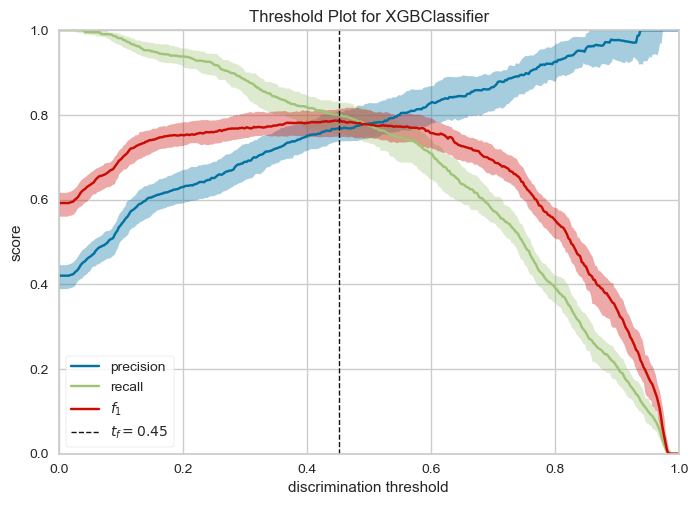

In [52]:
from yellowbrick.classifier import discrimination_threshold

discrimination_threshold(modelo.best_estimator_,x,y, exclude = 'queue_rate')
plt.show();

Por ejemplo, si nuestro objetivo prioritario fuera el precision el gráfico nos dice que podemos conseguir un precision en torno a 0.7 con umbrales entre 0.55 y 0.8, pero cuanto más cercano a 0.55 más recall mantendremos sin bajar mucho el precision.

Vamos a comprobarlo.

### Examinando mejores umbrales de corte

In [43]:
# Evaluar diferentes umbrales usando el mejor modelo

# Definir los umbrales específicos a evaluar
thresholds = [0.124, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Crear un DataFrame para almacenar las métricas de cada umbral
results = pd.DataFrame(columns=["Threshold", "ROC AUC", "Precision", "Recall", "F1 Score"])

# Evaluar cada umbral
for threshold in thresholds:
    # Convertir probabilidades en predicciones binarias según el umbral
    predictions = (pred >= threshold).astype(int)

    # Calcular las métricas y redondear a 3 decimales
    roc_auc = roc_auc_score(val_y, pred)
    precision = precision_score(val_y, predictions)
    recall = recall_score(val_y, predictions)
    f1 = f1_score(val_y, predictions)
    
    # Crear un DataFrame temporal con los resultados actuales
    temp_df = pd.DataFrame({
        "Threshold": [threshold],
        "ROC AUC": [roc_auc],
        "Precision": [precision],
        "Recall": [recall],
        "F1 Score": [f1]
    })
    
    # Concatenar el DataFrame temporal al de resultados
    results = pd.concat([results, temp_df], ignore_index=True)

# Mostrar resultados
print("Resultados para diferentes umbrales:")
print(results)

# Encontrar el umbral óptimo basado en el mejor F1 Score (o cualquier otra métrica que prefieras)
optimal_threshold = results.loc[results['F1 Score'].idxmax(), "Threshold"]
print(f"El umbral óptimo basado en el F1 Score es: {optimal_threshold}")



Resultados para diferentes umbrales:
   Threshold  ROC AUC  Precision  Recall  F1 Score
0       0.12     0.89       0.58    0.97      0.73
1       0.20     0.89       0.64    0.94      0.76
2       0.30     0.89       0.69    0.88      0.77
3       0.40     0.89       0.75    0.81      0.78
4       0.50     0.89       0.78    0.78      0.78
5       0.60     0.89       0.81    0.71      0.75
6       0.70     0.89       0.86    0.58      0.70
7       0.80     0.89       0.93    0.38      0.53
8       0.90     0.89       0.99    0.20      0.33
El umbral óptimo basado en el F1 Score es: 0.5


## Uso práctico del Umbral de Corte

Fíjate en los ejemplos anteriores que el modelo no cambia, siempre es el mismo, pero cambiando el umbral conseguimos resultados totalmente diferentes.

Ejemplos de uso:

* En un sistema de fraude en compras con tarjeta:
    * Si subimos el umbral: bloqueamos menos tarjetas pero se nos escapa más fraude
    * Si bajamos el umbral: evitamos más fraude pero se enfadan más clientes
    
* En una prueba diagnóstica:
    * Si subimos el umbral: gastamos menos presupuesto en tratamiento, pero enferman más personas
    * Si bajamos el umbral: prevenimos más enfermedades pero gastamos más dinero
    
* En un sistema de prevención de abandono:
    * Si subimos el umbral: podemos gestionar mejor y con más presupuesto los clientes que identifiquemos, pero no serán muchos
    * Si bajamos el umbral: podemos gestionar más clientes, pero en muchos de ellos estaremos tirando el dinero ya que no se iban a ir
    
* En un sistema de mantenimiento preventivo:
    * Si subimos el umbral: gastamos poco en inspecciones pero detectamos menos máquinas que se va a estropear
    * Si bajamos el umbral: se estropean menos máquinas, pero gastamos en mantenimientos de máquinas que no lo necesitaban

## Selección del umbral según el Valor Esperado

En muchos contextos de negocio no querremos tomar una decisión estratégica tan "artesanal" si no encontrar el valor que maximiza el valor esperado según unos escenarios de ingresos y costes.

A partir de una matriz de confusión podemos asignar ingresos a los aciertos y costes a los errores.

Por ejemplo:

* En una campaña comercial cada vez que acertemos tendremos el ingreso de una compra, y cada vez que fallemos tendremos el coste del contacto comercial
* En una inspección de fraude cada vez que acertemos tendremos el ingreso del fraude evitado, y cada vez que fallemos tendremos el coste de la inspección
* En un sistema de riesgo de crédito cada vez que acertemos tendremos el ingreso del capital impagado que hemos evitado, y cada vez que fallemos tendremos el coste del margen financiero que hubiéramos obtenido

Los pasos para aplicar este framework son:

1. Definir en el caso concreto la matriz de impacto esperado
2. Recorrer todos los umbrales, calcular su matriz de confusión y multiplicarla por la de impacto para calcular el valor esperado
3. Encontrar el umbral que maximiza el impacto esperado

Vamos a crear una función que automatice los puntos 1 y 2.

In [60]:
def max_roi(real,scoring, salida = 'grafico'):
    
    #DEFINIMOS LA MATRIZ DE IMPACTO
    ITN = 0
    IFP = -60
    IFN = -240
    ITP = 240 
    
    #DEFINIMOS LA FUNCION DEL VALOR ESPERADO
    def valor_esperado(matriz_conf):
        TN, FP, FN, TP = conf.ravel()
        VE = (TN * ITN) + (FP * IFP) + (FN * IFN) + (TP * ITP)
        return(VE)
    
    #CREAMOS UNA LISTA PARA EL VALOR ESPERADO
    ve_list = []
    
    #ITERAMOS CADA PUNTO DE CORTE Y RECOGEMOS SU VE
    for umbral in np.arange(0,1,0.001):
        predicho = np.where(scoring > umbral,1,0) 
        conf = confusion_matrix(real,predicho)
        ve_temp = valor_esperado(conf)
        ve_list.append(tuple([umbral,ve_temp]))
        
    #DEVUELVE EL RESULTADO COMO TGRAFICO O COMO EL UMBRAL ÓPTIMO
    df_temp = pd.DataFrame(ve_list, columns = ['umbral', 'valor_esperado'])
    if salida == 'grafico':
        solo_ve_positivo = df_temp[df_temp.valor_esperado > 0]
        plt.figure(figsize = (12,6))
        sns.lineplot(data = solo_ve_positivo, x = 'umbral', y = 'valor_esperado')
        plt.xticks(solo_ve_positivo.umbral, fontsize = 14)
        plt.xticks(np.arange(0, 1.1, 0.1))
        plt.yticks(solo_ve_positivo.valor_esperado, fontsize = 12)
        plt.yticks(np.arange(0, 135000, 5000));        
    else:    
        return(df_temp.iloc[df_temp.valor_esperado.idxmax(),0])

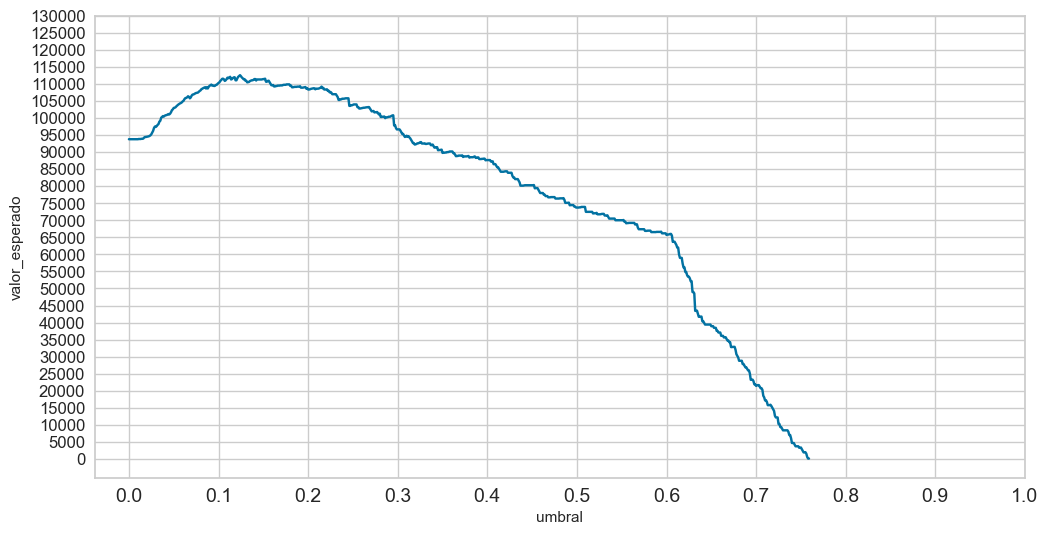

In [61]:
max_roi(val_y, pred)
plt.show();

In [62]:
max_roi(val_y, pred, salida = 'automatico')

0.124